In [1]:
import numpy as np
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
from src.dataloader import get_dataset
from src.model import Model
from src.utils import get_pred_coords, predict, plot_result

### Load sample test data

In [3]:
testset = get_dataset('data/','test')

### Predict

In [6]:
model = Model('mCBAMadd2')
model.to(device)
ckpt_path = 'ckpt/demo_ckpt.pth'
model.load_state_dict(torch.load(ckpt_path,map_location='cuda:0'))
model.eval()
result_list = predict(model, testset)
pred_coords = get_pred_coords(result_list)

### Visualization

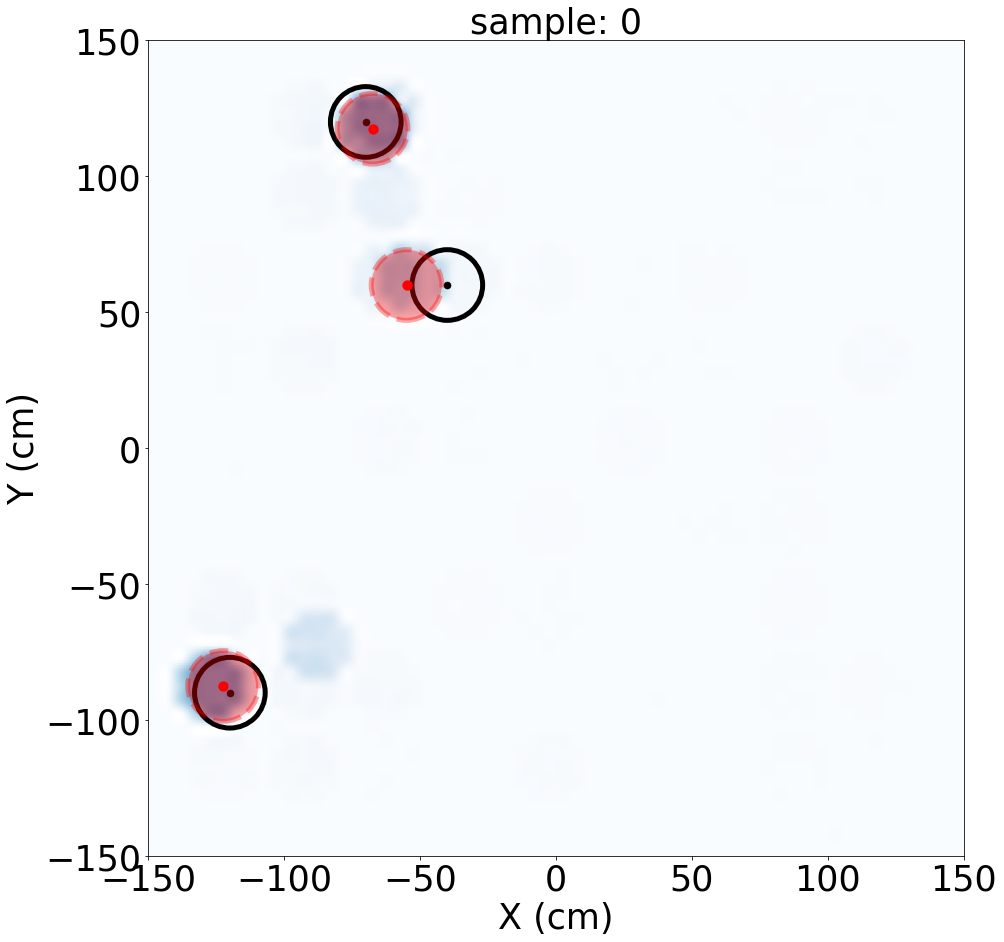

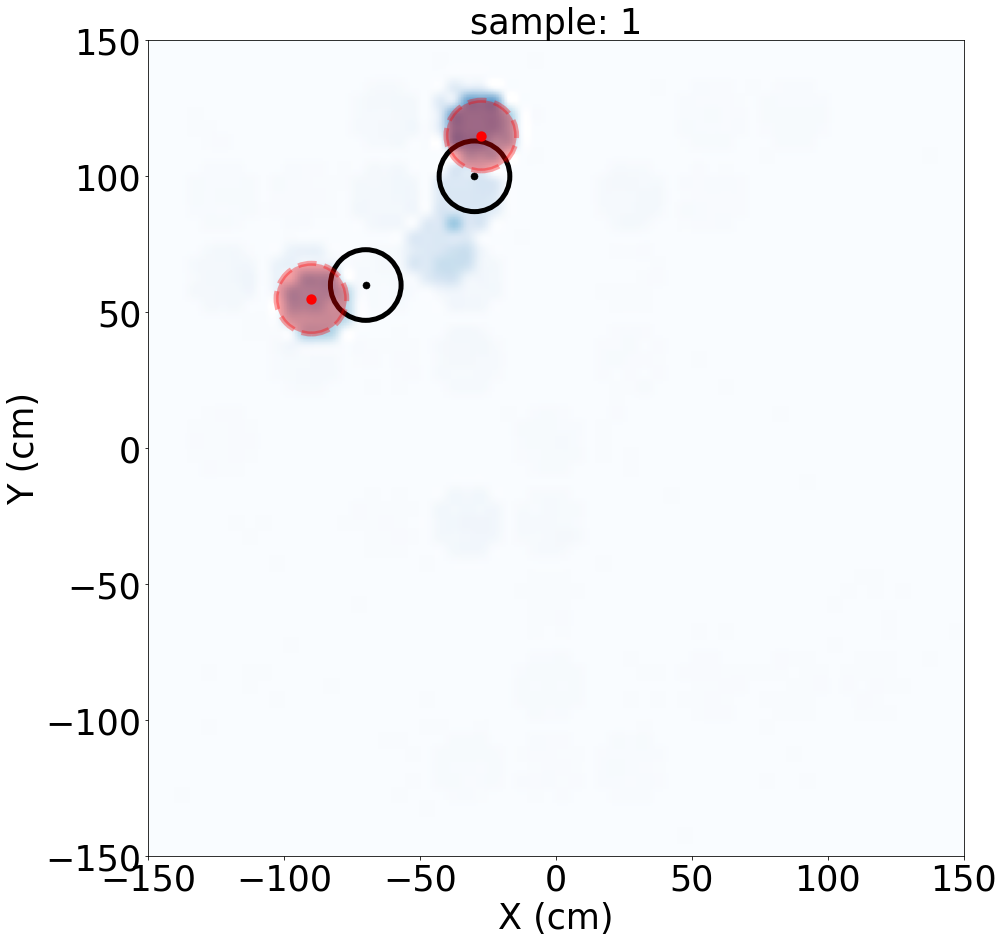

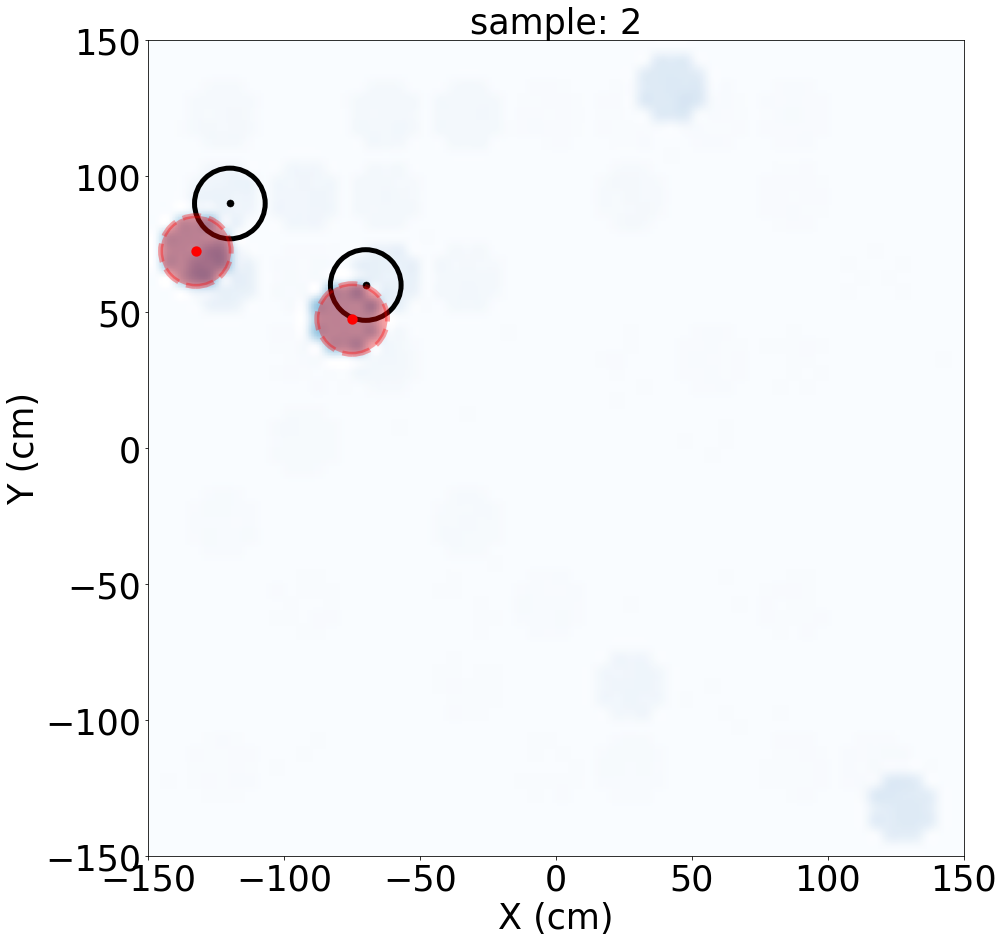

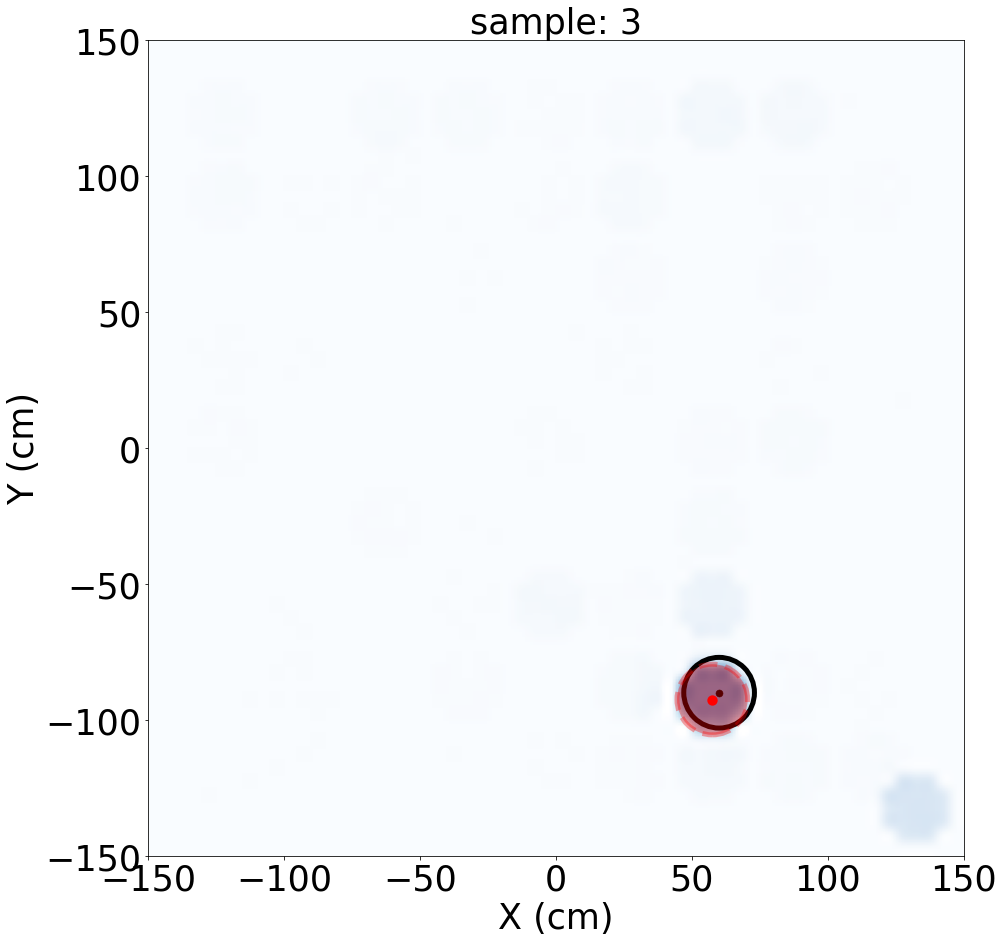

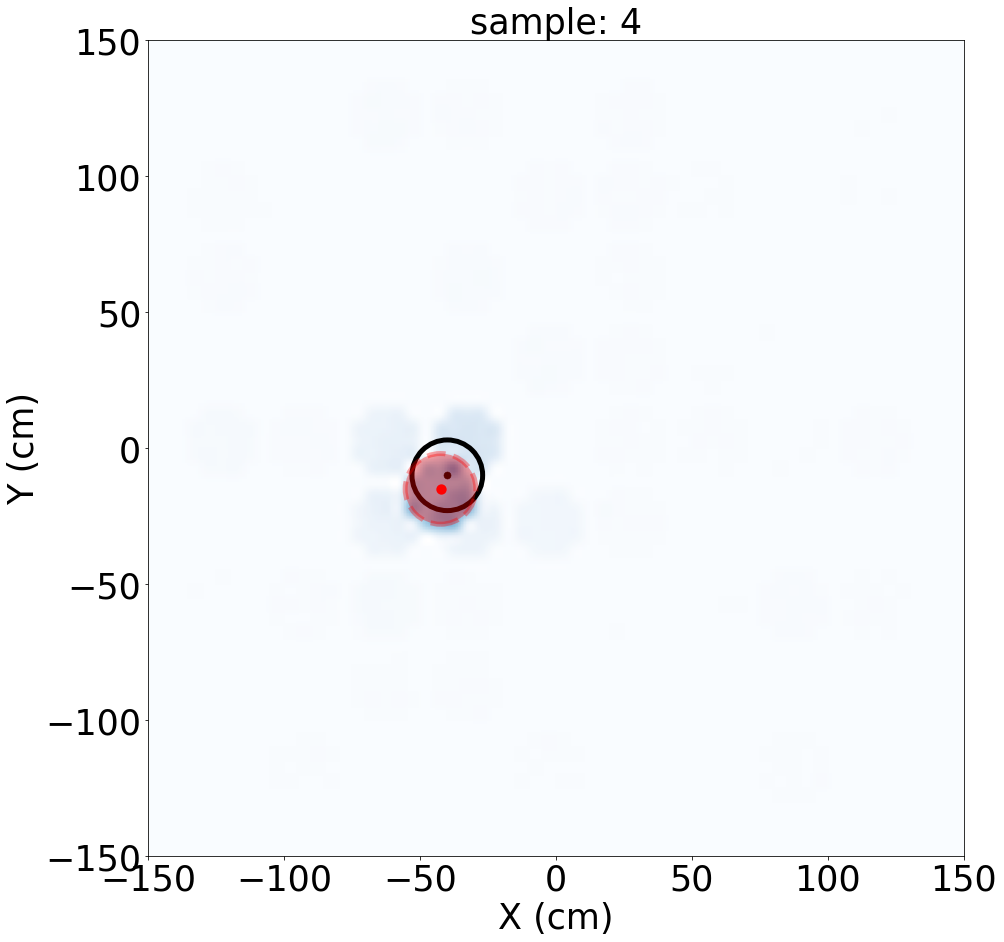

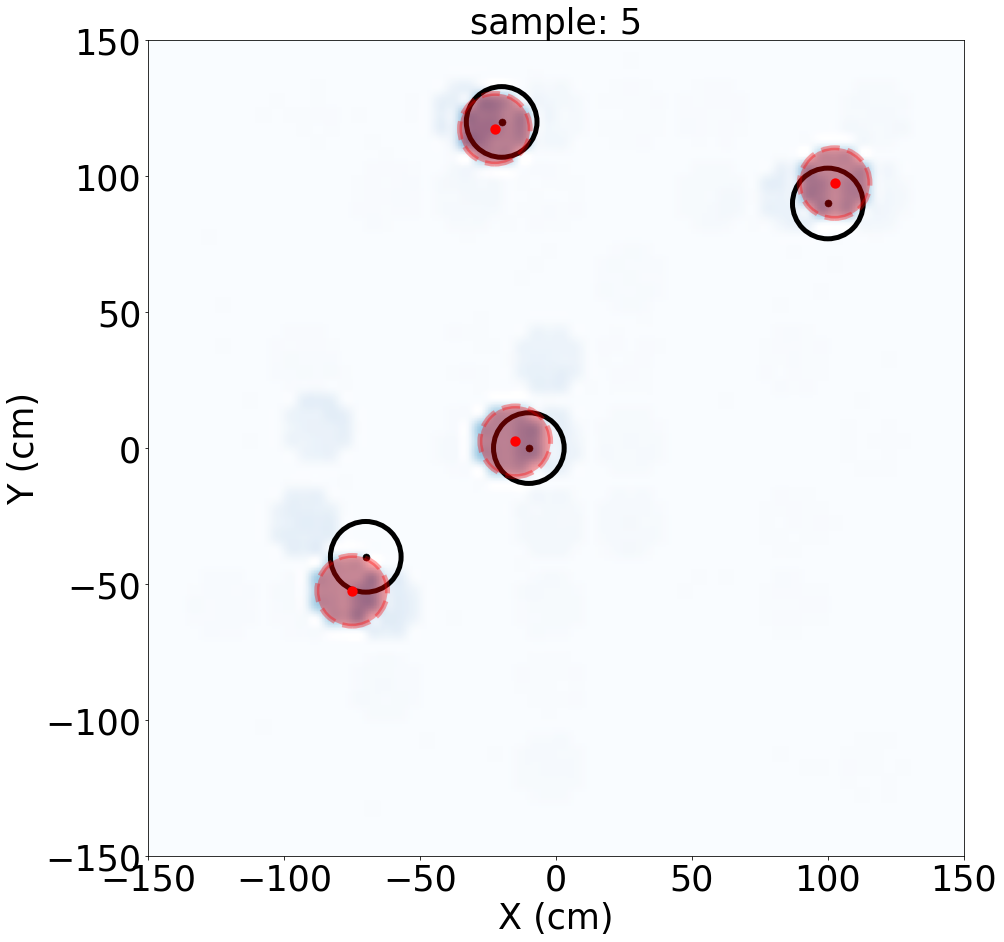

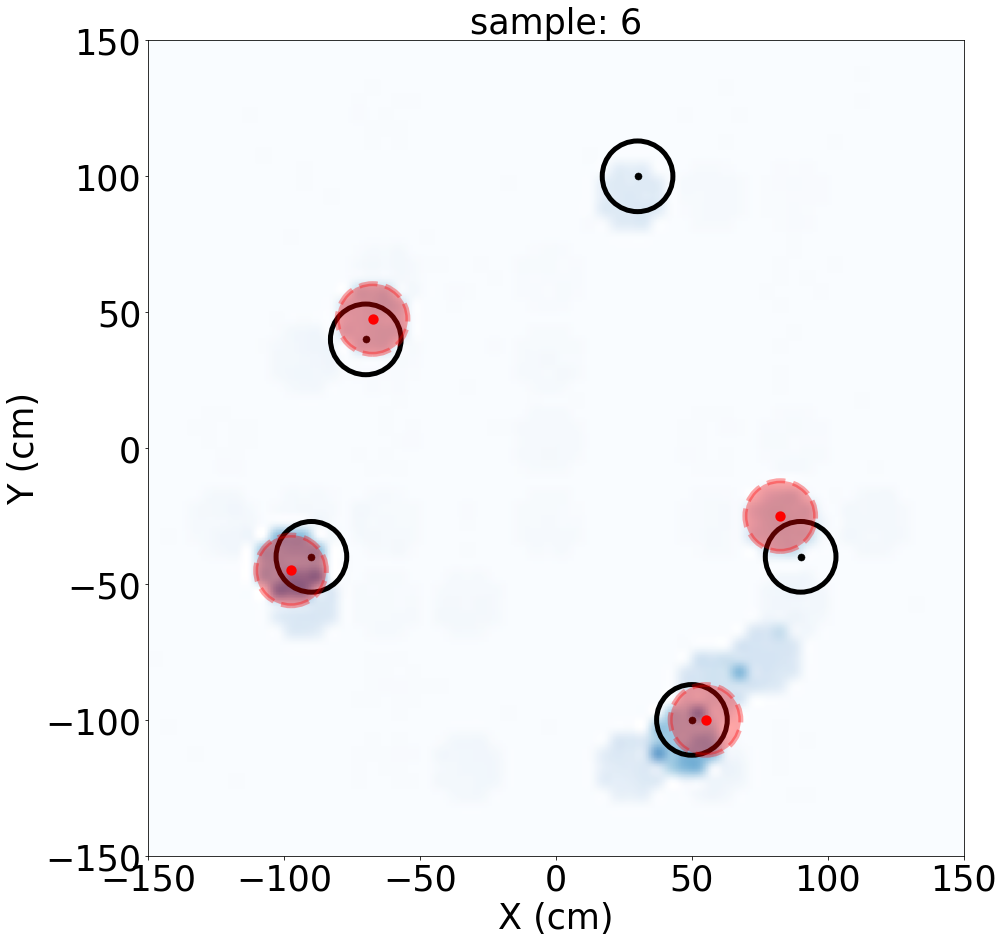

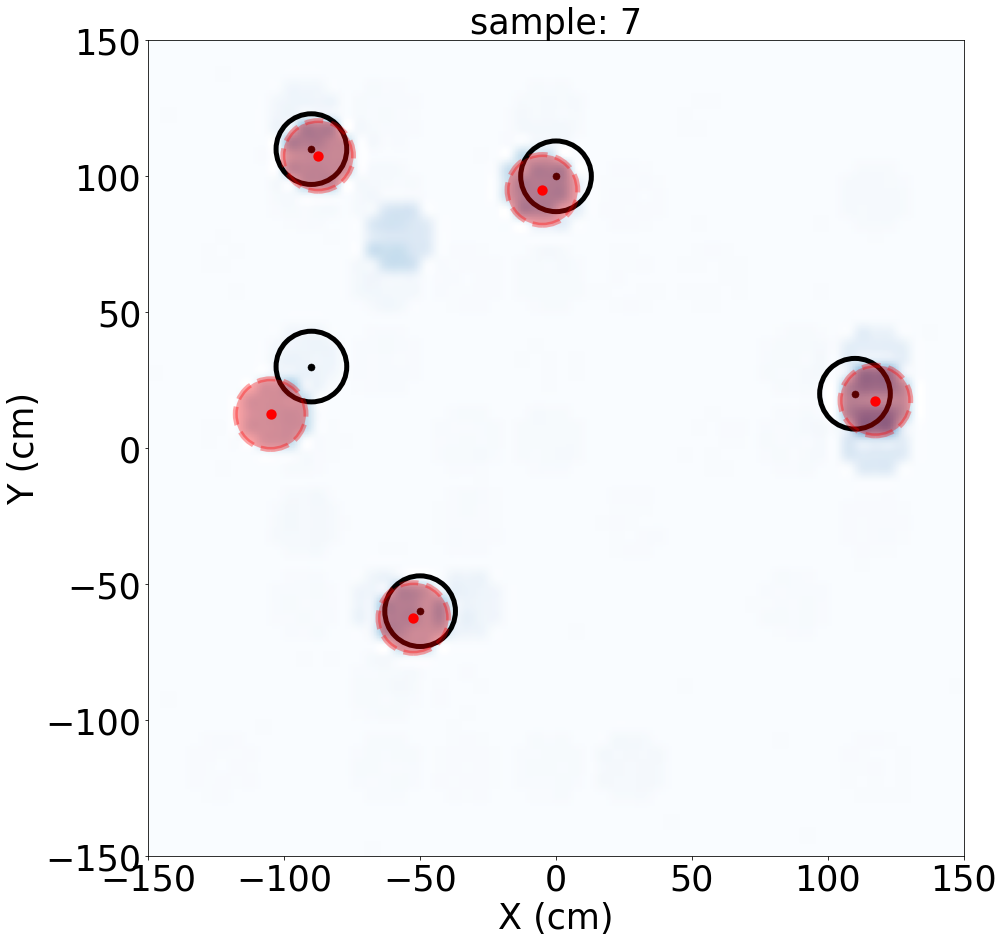

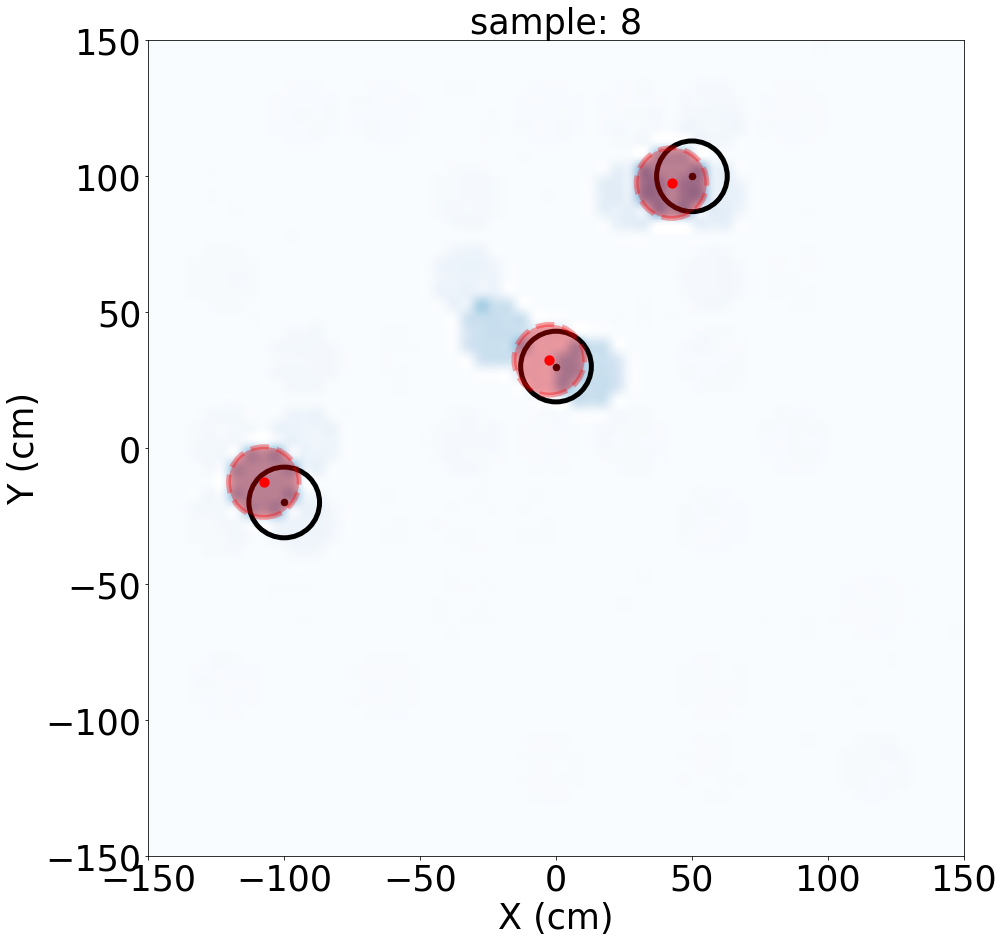

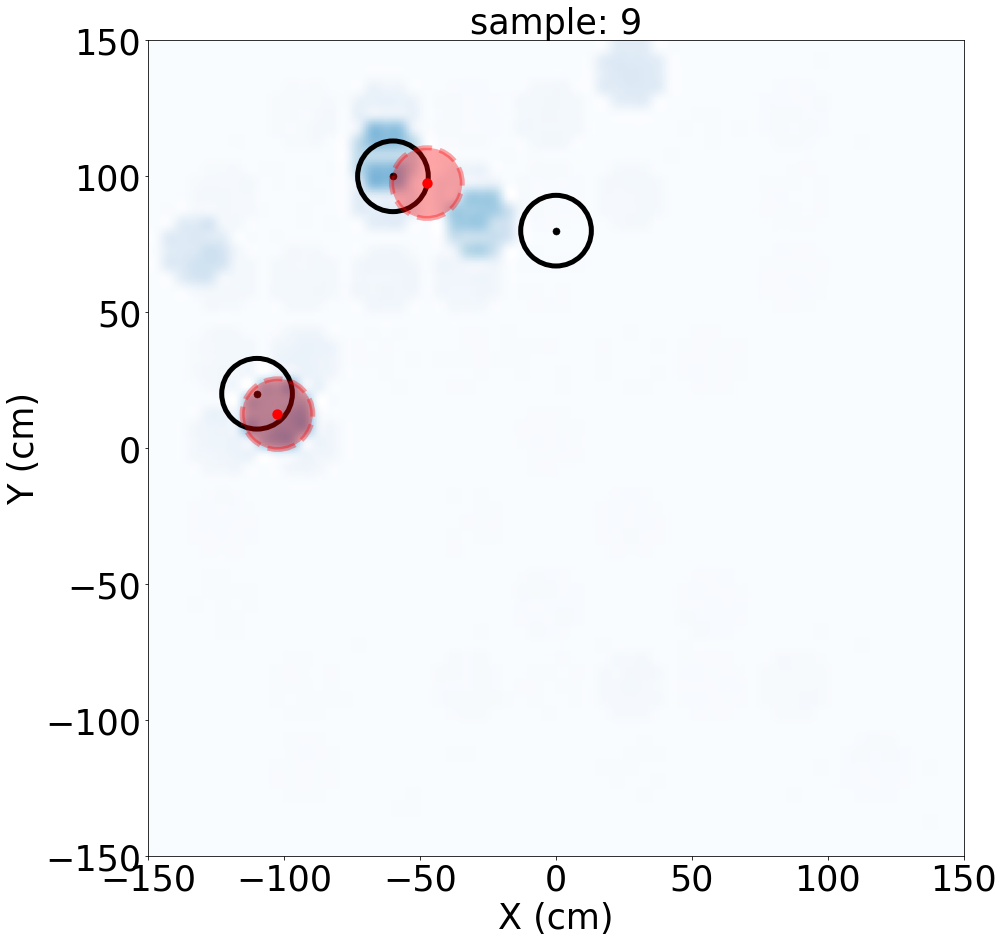

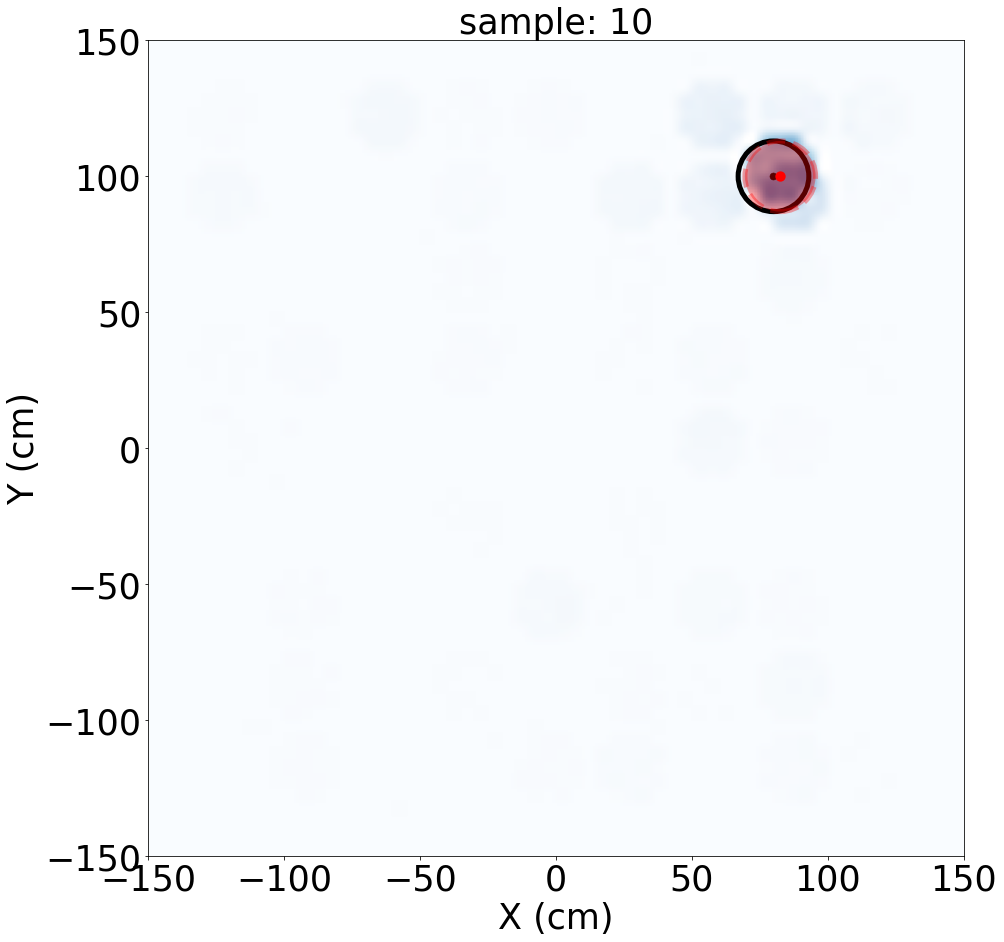

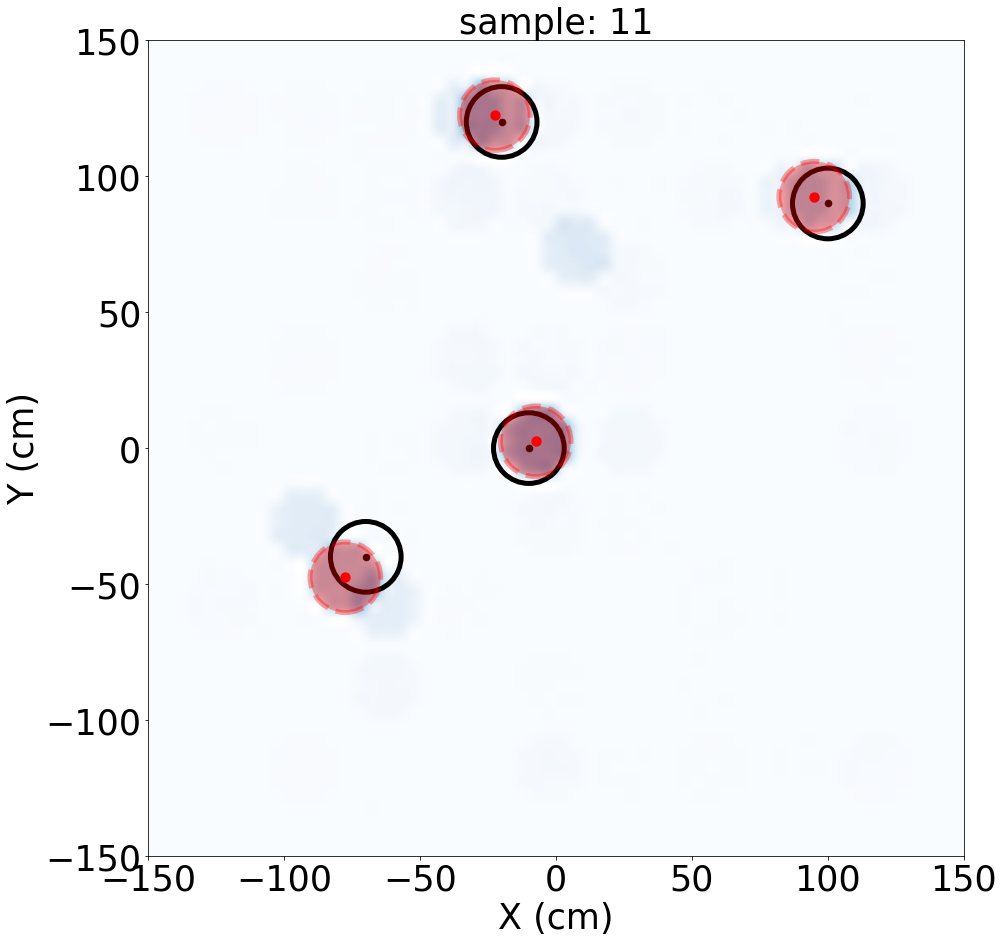

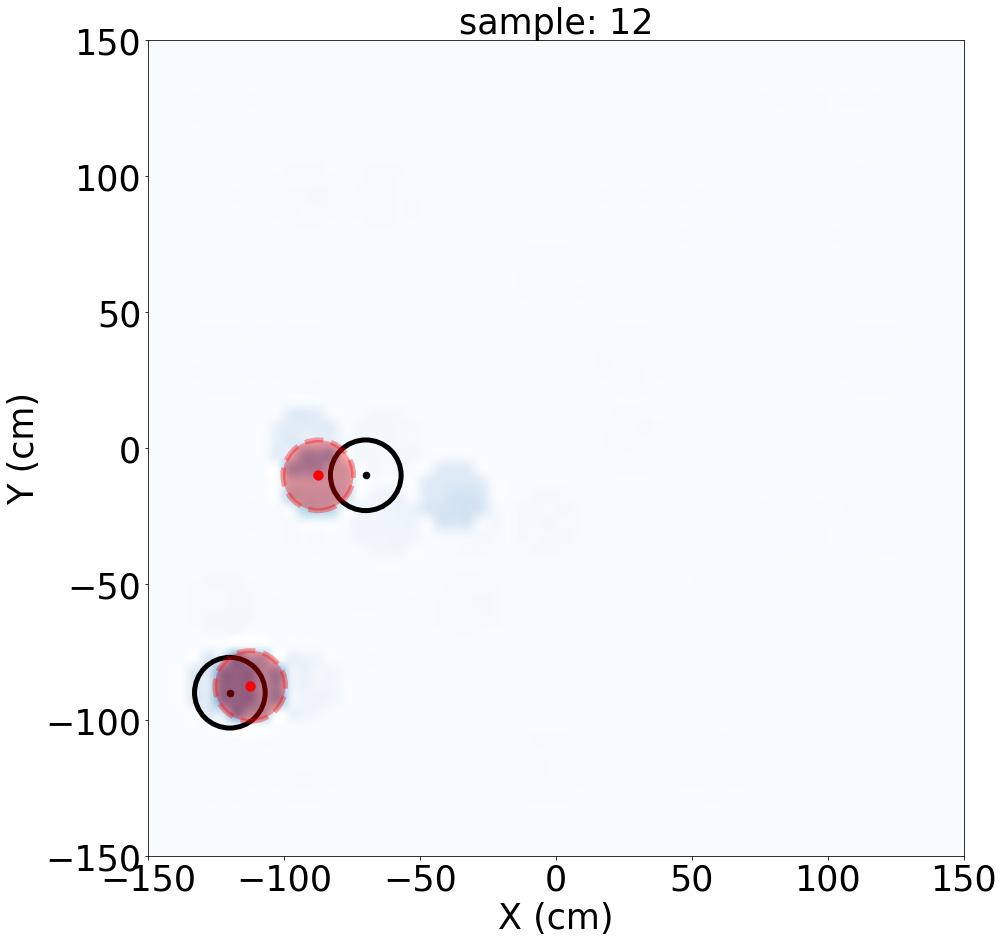

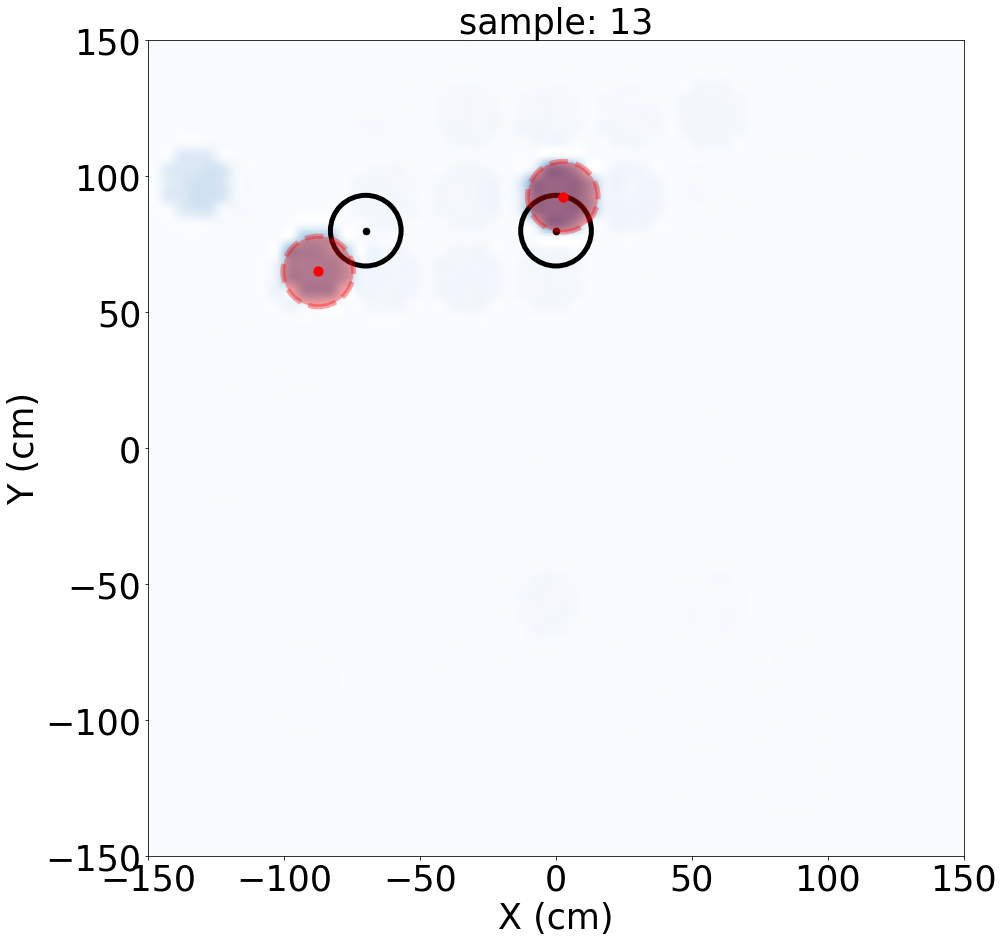

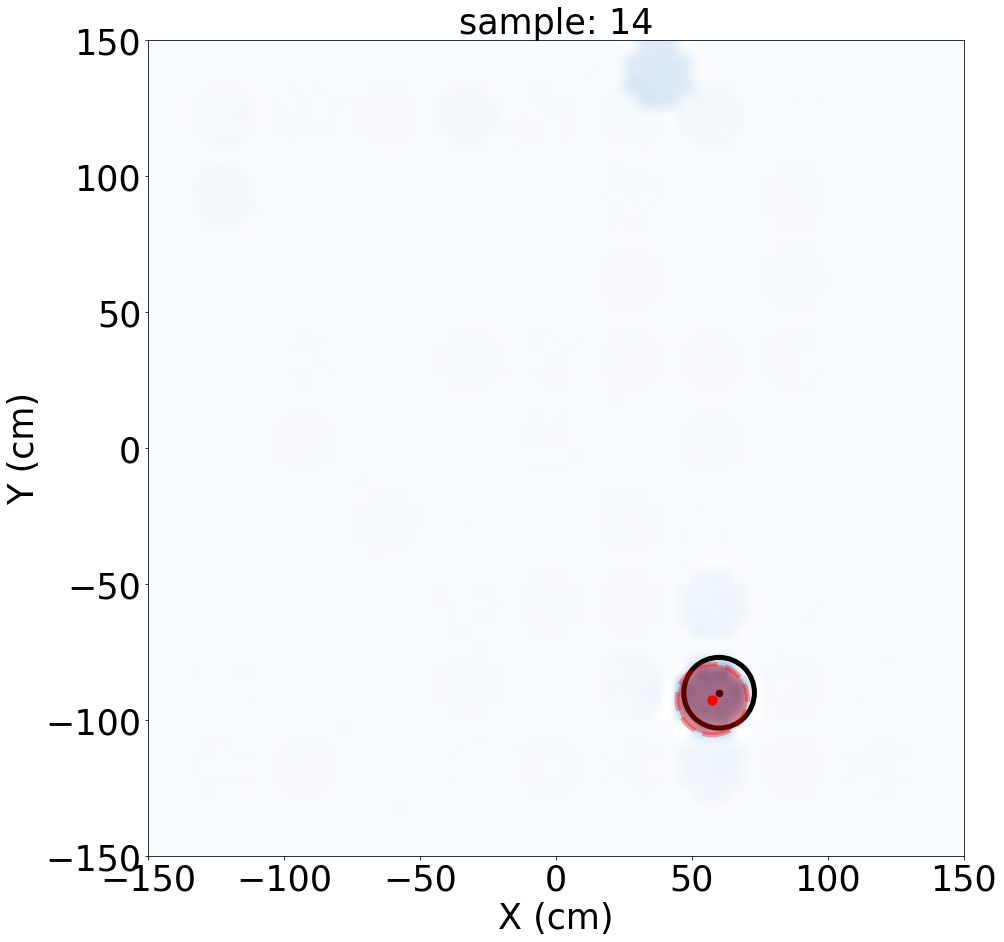

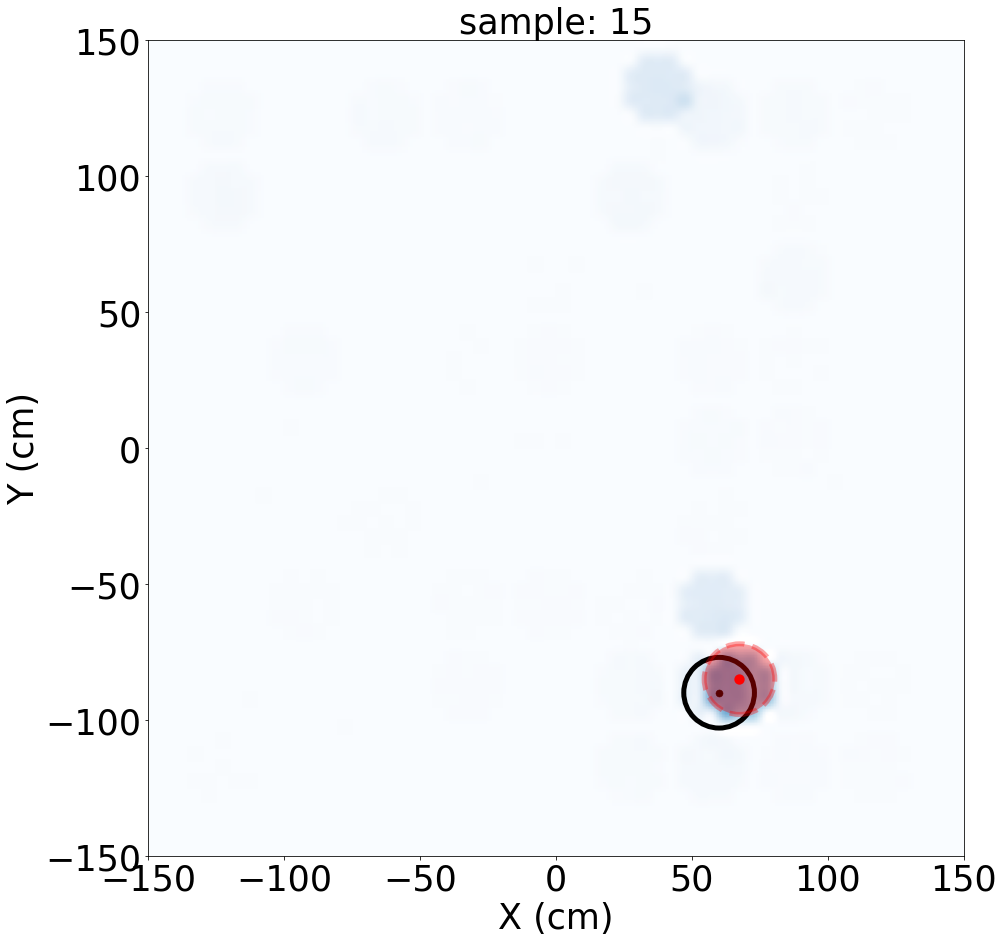

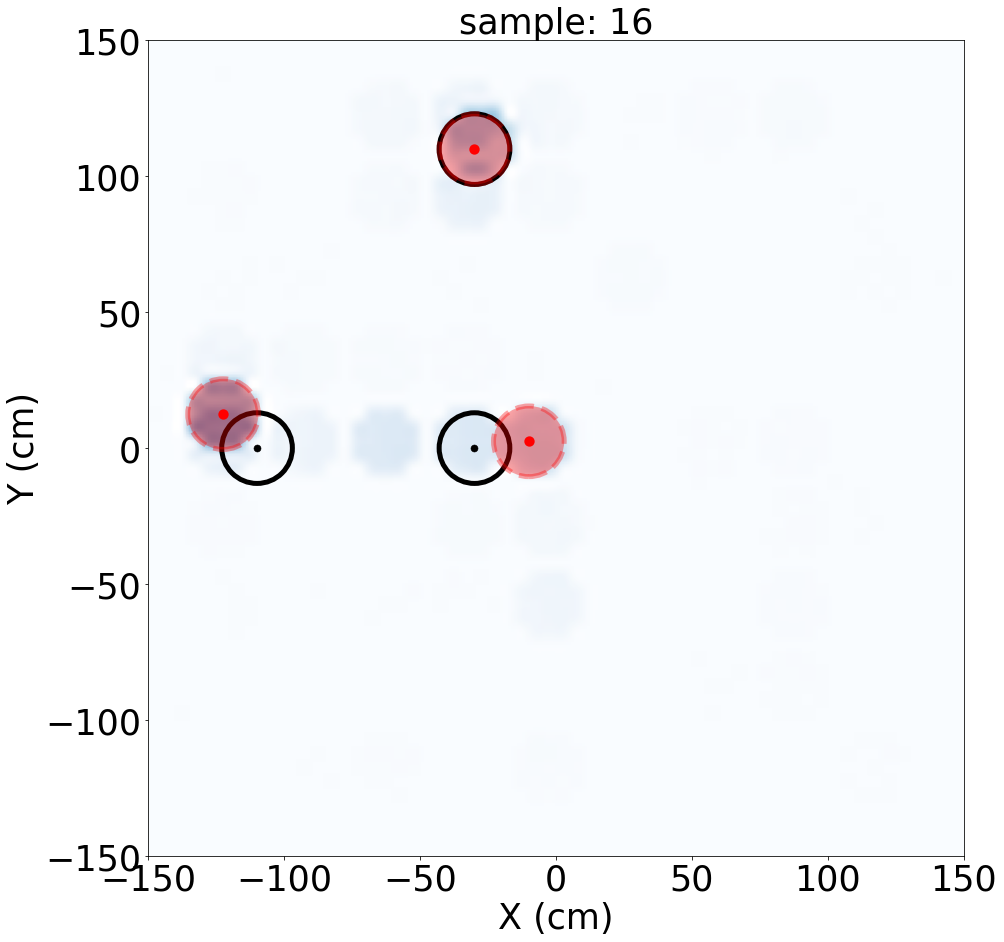

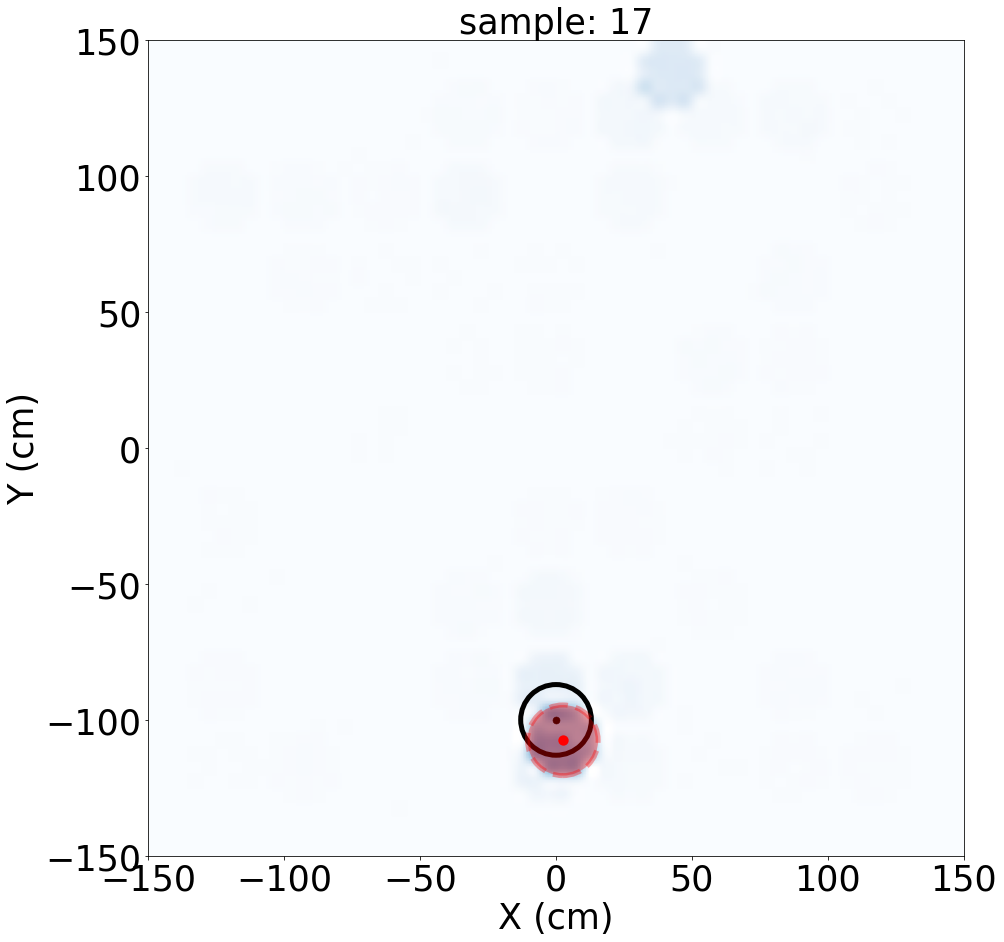

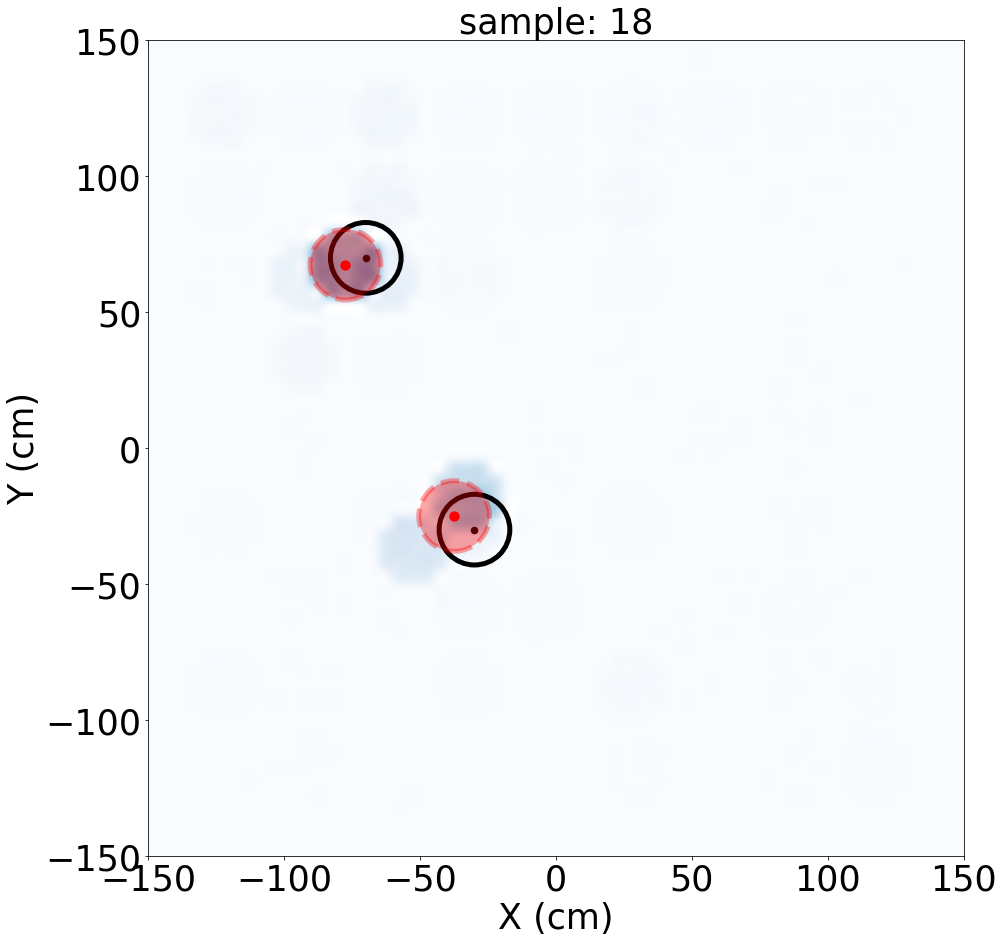

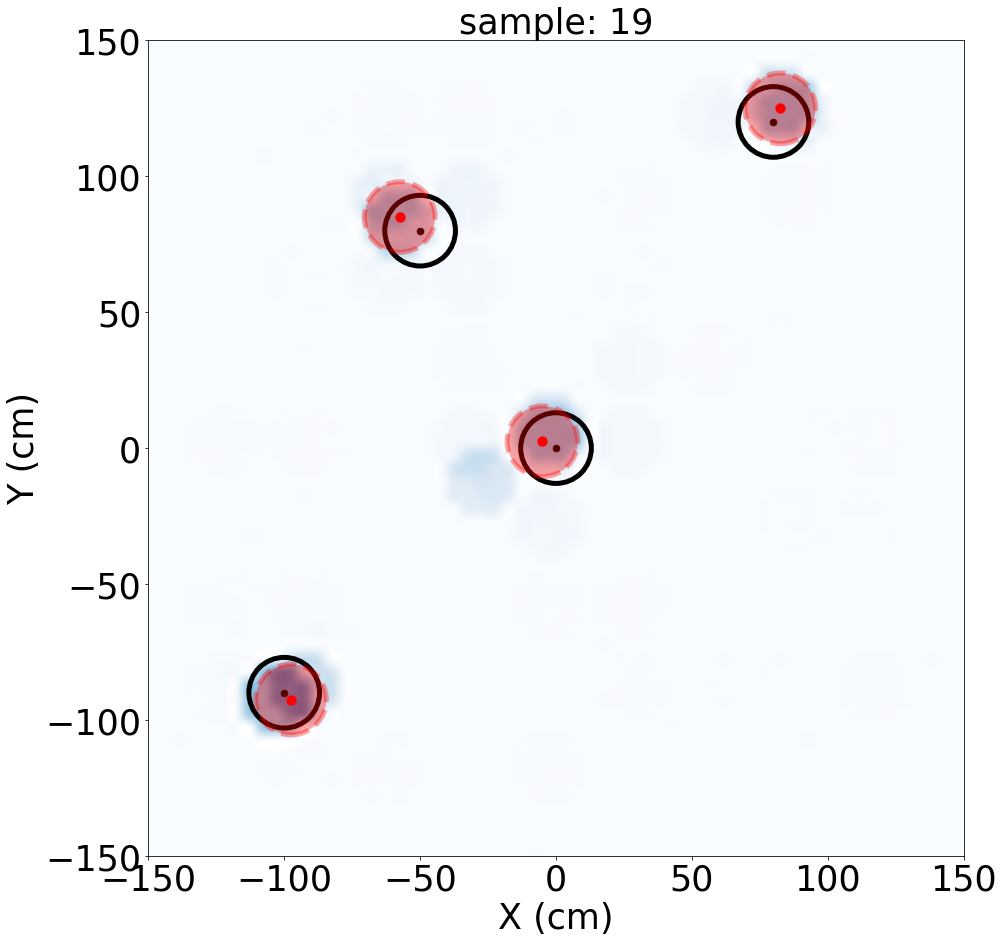

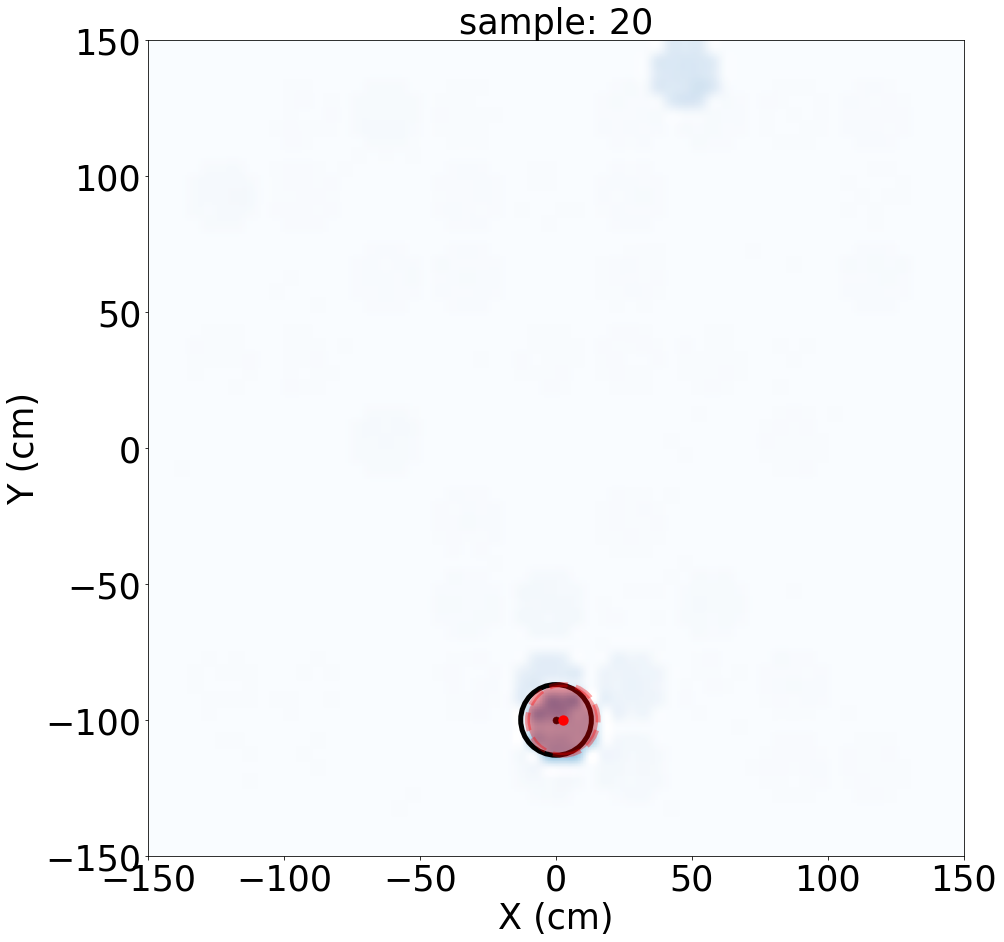

In [5]:
GT_coords_list = np.load('data/test_GT_coords.npy', allow_pickle=True)

for visual_index in range(len(pred_coords)):
    plot_result(result_list, GT_coords_list, pred_coords, visual_index)